# Anillos e ideales

En `sage` existen varios tipos de anillos conmutativos, y para cada uno de estos tipos existen funciones específicas.

El manual de referencia para esta sección es [Sage Reference Manual: General Rings, Ideals, and Morphisms](http://doc.sagemath.org/pdf/en/reference/rings/rings.pdf).



## Anillos básicos

Los ejemplos básicos son el anillo de los números enteros, que se denota en sage como `ZZ`, y el de los números racionales, `QQ`.

In [1]:
ZZ in Fields

False

In [2]:
ZZ in EuclideanDomains

True

In [3]:
ZZ.is_integral_domain()

True

In [4]:
ZZ.is_integrally_closed()

True

In [5]:
ZZ.is_commutative()

True

Los anillos tienen cero y uno.

In [6]:
ZZ.zero()

0

In [7]:
ZZ.one()

1

## Extensiones algebraicas 

También tenemos anillos de enteros. Para ello vamos a ver cuerpos de números algebraicos.

In [8]:
x = polygen(ZZ, 'x')

In [9]:
K = NumberField(x^2+1,'s')

El generador de `K` se pintará como `s`, pero para referirnos a él tenemos que asignarle una variable.

In [10]:
a=K.0

Como `a` verifica la ecuación `x^2+1=0`, su cuadrado es -1

In [11]:
a^2

-1

In [12]:
a==i

False

In [13]:
i^2

-1

El anillo de enteros algebraicos de `K` se obtiene como sigue.

In [14]:
OK = K.ring_of_integers()

Que tiene las siguientes propiedades bien conocidas:

In [15]:
OK.is_commutative()

True

In [16]:
OK.is_integral_domain()

True

In [17]:
OK.is_integrally_closed()

True

In [18]:
OK.categories()

[Category of integral domains,
 Category of domains,
 Category of commutative rings,
 Category of rings,
 Category of rngs,
 Category of semirings,
 Category of associative additive commutative additive associative additive unital distributive magmas and additive magmas,
 Category of additive commutative additive associative additive unital distributive magmas and additive magmas,
 Category of additive commutative additive associative distributive magmas and additive magmas,
 Category of additive associative distributive magmas and additive magmas,
 Category of distributive magmas and additive magmas,
 Category of magmas and additive magmas,
 Category of commutative monoids,
 Category of monoids,
 Category of semigroups,
 Category of commutative magmas,
 Category of unital magmas,
 Category of magmas,
 Category of commutative additive groups,
 Category of additive groups,
 Category of additive inverse additive unital additive magmas,
 Category of commutative additive monoids,
 Category

Podemos definir extensiones de `ZZ` directamente

In [19]:
S=ZZ[sqrt(5)]

In [20]:
S.is_integral_domain()

True

In [21]:
S.is_integrally_closed()

False

In [22]:
SS=NumberField(x^2-5,'s').ring_of_integers()

In [23]:
SS.is_integrally_closed()

True

In [24]:
SS.0

1/2*s + 1/2

De hecho la clausura entera de `S` es $\mathbb{Z}\left[\frac{1+\sqrt{5}}2\right]$.

In [25]:
SI=S.integral_closure()

In [26]:
SI.0

1/2*sqrt5 + 1/2

In [27]:
SI in PrincipalIdealDomains

False

## Anillos de enteros módulo un entero positivo

Para definir $\mathbb{Z}_n$ simplemente usamos `Integers(n)`

In [28]:
Z7=Integers(7)

In [29]:
{i for i in Z7 if i.is_unit()}

{1, 2, 3, 4, 5, 6}

In [30]:
Z7.unit_group()

Multiplicative Abelian group isomorphic to C6

In [31]:
Z7.unit_group().gens()

(f,)

In [33]:
(f,)=Z7.unit_group().gens()

In [34]:
f^6

1

In [35]:
[f^n for n in range(7)]

[1, f, f^2, f^3, f^4, f^5, 1]

In [37]:
e.is_unit()

True

In [38]:
Z7.is_field()

True

In [39]:
Z7.order()

7

In [40]:
Z8=Integers(8)

In [41]:
Z8.is_integral_domain()

False

In [42]:
Z8.gens()

(1,)

In [43]:
1 in Z8

True

In [44]:
23 in Z8

True

In [45]:
Z8.cardinality()

8

In [46]:
Z8.unit_group()

Multiplicative Abelian group isomorphic to C2 x C2

## Anillos de polinomios

Existen varias formas de definir anillos de polinomios. También podemos trabajar con series formales y de Laurent.

In [47]:
P=QQ['x']

In [49]:
P.inject_variables()

Defining x


In [50]:
x^2+1 in P

True

In [51]:
P

Univariate Polynomial Ring in x over Rational Field

In [52]:
P==PolynomialRing(QQ,"x")

True

Por el Teorema de la base de Hilbert, `P` es noetheriano

In [53]:
P.is_noetherian()

True

Y también sabemos que es un dominio de factorización única.

In [54]:
P.is_unique_factorization_domain()

True

Los anillos de series de potencias se definen como sigue.

In [55]:
S.<t>=PowerSeriesRing(QQ)

In [56]:
1/(1-t) in S

True

O el anillo de series de Laurent

In [63]:
L.<t> = LaurentSeriesRing(QQ)

In [58]:
1/t in S

False

In [59]:
1/t in L

True

También podemos definir anillos de estos tipos con varias variables.

In [60]:
P = QQ["x", "y", "z"]

In [64]:
S.<t,u> = PowerSeriesRing(QQ)

## Cuerpos finitos

Con la función `GF` (cuerpo de Galois) podemos definir cualquier cuerpo finito. También podemos usar `FiniteField`.

In [65]:
K=GF(5)

In [66]:
a=K.0

In [67]:
5*a

0

In [68]:
K.some_elements()

[1, 1, 4, 0]

In [69]:
a+a

2

In [70]:
K.is_field()

True

In [71]:
K=GF(25,'a')

In [72]:
K.characteristic()

5

In [73]:
K.random_element()

3*a + 2

In [74]:
K.gens()

(a,)

## Cuerpos de fracciones

Para un dominio de integridad podemos definir su cuerpo de fracciones.

In [77]:
P.<x> = QQ[]

In [78]:
K=P.fraction_field()

In [79]:
1/x in K

True

In [80]:
f=(1-x)/(1+x)

In [81]:
f in K

True

In [82]:
f.numerator()

-x + 1

In [83]:
f.denominator()

x + 1

Como es costumbre en `sage`, existen formas alternativas para definir cuerpos de fracciones

In [84]:
K==Frac(QQ["x"])

True

In [85]:
ZZ.fraction_field()

Rational Field

## Producto de anillos

Con `cartesian_product` podemos construir producto de anillos.

In [86]:
CZQ= ZZ.cartesian_product(QQ)

In [87]:
CZQ

The Cartesian product of (Integer Ring, Rational Field)

In [88]:
CZQ.one()

(1, 1)

# Ideales

Hay muchas formas de definir ideales, si el anillo no se especifica, `sage` intenta determinarlo.

In [89]:
P.<x,y>=QQ[]

In [90]:
I=Ideal(P,[x+y,x^2+1])

In [91]:
I==P.ideal(x+y,x^2+1)

True

In [92]:
I==(x+y,x^2+1)*P

True

In [93]:
I==Ideal(x+y,x^2+1)

True

Y podemos definir cocientes de anillos por ideales.

In [94]:
ZZ8=ZZ.quotient(ZZ.ideal(8))

In [95]:
ZZ8==Integers(8)

True

In [96]:
I=2*ZZ

In [97]:
J=4*ZZ

La inclusión de ideales no está definida, así que vamos a hacer una.

In [98]:
def contenido(I,J):
    return all(g in J for g in I.gens())

In [99]:
contenido(I,J)

False

In [100]:
contenido(J,I)

True

Y de forma alternativa también se puede hacer así:

In [101]:
def contenido(I,J):
    return I+J==J

In [102]:
I.category()

Category of ring ideals in Integer Ring

Usando el truco de cómo añadir un método (en este caso lo vamos a redefinir) explicado en [stackoverflow](http://stackoverflow.com/questions/972/adding-a-method-to-an-existing-object-instance) podemos usar `<=` como inclusión 

In [103]:
sage.rings.ideal.Ideal_generic.__lt__=contenido

In [104]:
J<I

True

In [105]:
I<J

False

Tenemos operaciones básicas de suma y producto de ideales.

In [106]:
4*ZZ+6*ZZ

Principal ideal (2) of Integer Ring

In [107]:
(4*ZZ)*(6*ZZ)

Principal ideal (24) of Integer Ring

Pero curiosamente no hay una intersección para ideales de dominios de ideales principales. Vamos a definir una.

In [108]:
4*ZZ.intersection(6*ZZ)

AttributeError: 'sage.rings.integer_ring.IntegerRing_class' object has no attribute 'intersection'

In [109]:
def intersection(I,J):
    a = I.gen()
    b = J.gen()
    #q = (a*b).quo_rem(gcd(a,b))
    #return Ideal(q[0])
    return Ideal(lcm(a,b))

In [110]:
intersection(4*ZZ,6*ZZ)

Principal ideal (12) of Integer Ring

In [111]:
sage.rings.ideal.Ideal_pid.intersection=intersection

In [112]:
(4*ZZ).intersection(6*ZZ)

Principal ideal (12) of Integer Ring

In [113]:
sage.rings.ideal.Ideal_pid.__and__=intersection

In [114]:
(4*ZZ)&(6*ZZ)

Principal ideal (12) of Integer Ring

In [116]:
R.<x> = QQ[]

In [117]:
I=x*R

In [118]:
J=(x^2+1)*R

In [119]:
I&J

Principal ideal (x^3 + x) of Univariate Polynomial Ring in x over Rational Field

In [120]:
I&J<I*J

True

Podemos también definir el cociente de ideales, $I/J$ cuando $J\subseteq I$.

In [121]:
def cocienteideales(I,J):
    if not(J<I):
        raise "El segundo argumento debe estar incluido en el primero"
    return I.gens()*I.ring().quo(J)

In [122]:
I.ring()

Univariate Polynomial Ring in x over Rational Field

In [123]:
cocienteideales(2*ZZ,4*ZZ)

Principal ideal (2) of Ring of integers modulo 4

Y podemos asignarle una operación...

In [126]:
sage.rings.ideal.Ideal_pid.__floordiv__=cocienteideales

In [128]:
(2*ZZ)//(4*ZZ)

Principal ideal (2) of Ring of integers modulo 4

In [129]:
(I+J)//I

Principal ideal (1) of Univariate Quotient Polynomial Ring in xbar over Rational Field with modulus x

In [130]:
J//(I&J)

Principal ideal (xbar^2 + 1) of Univariate Quotient Polynomial Ring in xbar over Rational Field with modulus x^3 + x

In [131]:
(6*ZZ+4*ZZ)//(4*ZZ)

Principal ideal (2) of Ring of integers modulo 4

In [132]:
6*ZZ//((6*ZZ)&(4*ZZ))

Principal ideal (6) of Ring of integers modulo 12

En anillos de polinomios existe además `I.quotient(J)` que se corresponde con $I:J = \{ p\in P \mid p J \subseteq I \}$, con $P$ el anillo de polinomios

In [133]:
P.<x,y> = QQ[]

In [134]:
I=(x^2,y)*P

In [135]:
J=(x-y)*P

In [136]:
I.quotient(J)

Ideal (y, x) of Multivariate Polynomial Ring in x, y over Rational Field

In [137]:
J.quotient(I)

Ideal (x - y) of Multivariate Polynomial Ring in x, y over Rational Field

### Ideales primos y maximales

Veamos por ejemplo que el ideal $\langle x^3-y^2\rangle$ de $\mathbb Q[x,y]$ es primo

In [138]:
P.<x,y> = QQ[]

In [139]:
I=(x^3-y^2)*P

In [140]:
I.is_prime()

True

Este ideal se corresponde con una curva con una cúspide en el 0 (si la vemos sobre $\mathbb C$). A continuación hacemos una representación de su parte "real".

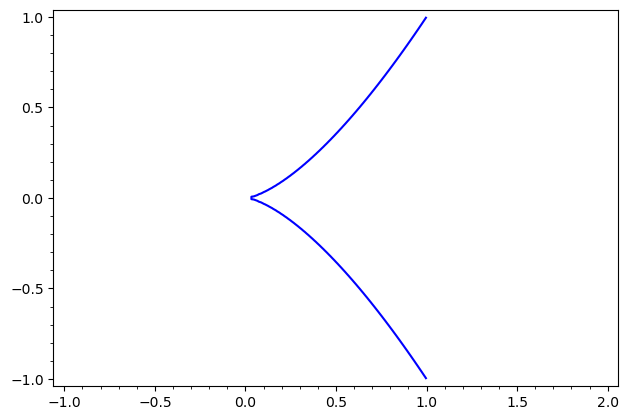

In [141]:
implicit_plot(x^3-y^2, (x,-1,2), (y,-1,1))

Sin embargo, `sage` no puede determinar si `I` es maximal. En algunos tipos de anillos, sí puede hacer esa comprobación.

In [142]:
I=2*ZZ

In [143]:
I.is_maximal()

True

In [145]:
R.<x,y,z> = QQ[]

In [146]:
I=(x*y-z^2)*R

In [147]:
I.is_prime()

True

### Ideales radicales 

En `sage` podemos calcular el radical de algunos ideales con el método `radical()`.

In [149]:
R.<x,y> = GF(2)[]

In [150]:
I=(x,y)*R

In [151]:
J=(x-1,y-1)*R

Veamos que el producto de `I` y `J` es radical

In [152]:
K=I*J

In [153]:
K.radical()==K

True

In [154]:
I.radical()

Ideal (y, x) of Multivariate Polynomial Ring in x, y over Finite Field of size 2

Otro ejemplo

In [155]:
I=(x^2,y^2)*R

In [156]:
I.radical()

Ideal (y, x) of Multivariate Polynomial Ring in x, y over Finite Field of size 2

# Homomorfismos de anillos

Sage ofrece varios ejemplos de anillos de homomorfismos.
Entre ellos tenemos la inclusión natural de un dominio de integridad en su cuerpo de fracciones.

In [157]:
H=Hom(ZZ,QQ)

In [158]:
H([1])

Ring morphism:
  From: Integer Ring
  To:   Rational Field
  Defn: 1 |--> 1

In [159]:
inc = H([1])

In [160]:
inc(26)

26

O el homomorfismo natural de un anillo en un cociente por uno de sus ideales. Basta dar la imagen de los generadores.

In [161]:
f=ZZ.hom([1],ZZ.quo(4*ZZ))

In [162]:
f(1)==f(5)

True

In [163]:
f(6)

2

Podemos calcular composición de homomorfismos.

In [164]:
R.<x,y,z> = QQ[]
S.<t> = QQ[]

In [165]:
f=R.hom([t^3,t^5,t^7], S)

In [166]:
f(x^5-y^3)

0

In [167]:
g=S.hom([t^2],S)

In [168]:
g*f

Ring morphism:
  From: Multivariate Polynomial Ring in x, y, z over Rational Field
  To:   Univariate Polynomial Ring in t over Rational Field
  Defn: x |--> t^6
        y |--> t^10
        z |--> t^14

O calcular núcleos

In [169]:
f.kernel()

Ideal (y^2 - x*z, x^3*y - z^2, x^4 - y*z) of Multivariate Polynomial Ring in x, y, z over Rational Field